NEW ONE

In [ ]:
#New one

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/MyDrive/project/fakeimage new/fakeimage new

/content/drive/MyDrive/project/fakeimage new/fakeimage new


In [ ]:
ls

au/          fakeimage_phase1.ipynb  __pycache__/         test/
classify.py  model_casia_run1.h5     resaved.jpg          Tp/
ela          predict.py              resaved.resaved.jpg


In [ ]:
import matplotlib as matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
np.random.seed(2)
print(np.random.seed(2))

None


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding


In [ ]:
sns.set(style='white', context='notebook', palette='deep')
print(sns.set(style='white', context='notebook', palette='deep'))

None


In [ ]:
#error level analysis:data prepration

from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance


In [ ]:
#upto my knowledge path of all the images inside the test is return in an array
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]
get_imlist("/content/drive/MyDrive/project/fakeimage new/fakeimage new/test")

['/content/drive/MyDrive/project/fakeimage new/fakeimage new/test/iman.jpg',
 '/content/drive/MyDrive/project/fakeimage new/fakeimage new/test/iron.jpg',
 '/content/drive/MyDrive/project/fakeimage new/fakeimage new/test/iron.ela.jpg',
 '/content/drive/MyDrive/project/fakeimage new/fakeimage new/test/DSC09279.ela.jpg',
 '/content/drive/MyDrive/project/fakeimage new/fakeimage new/test/iron.resaved.jpg',
 '/content/drive/MyDrive/project/fakeimage new/fakeimage new/test/iman.ela.jpg',
 '/content/drive/MyDrive/project/fakeimage new/fakeimage new/test/iman.resaved.jpg']

#function to convert an image into ela

def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)

    ela_im = ImageChops.difference(im, resaved_im)

    return ela_im

  

      

   



In [ ]:
#without enhance
Image.open(r"resaved.jpg") 
convert_to_ela_image("resaved.jpg",70) 

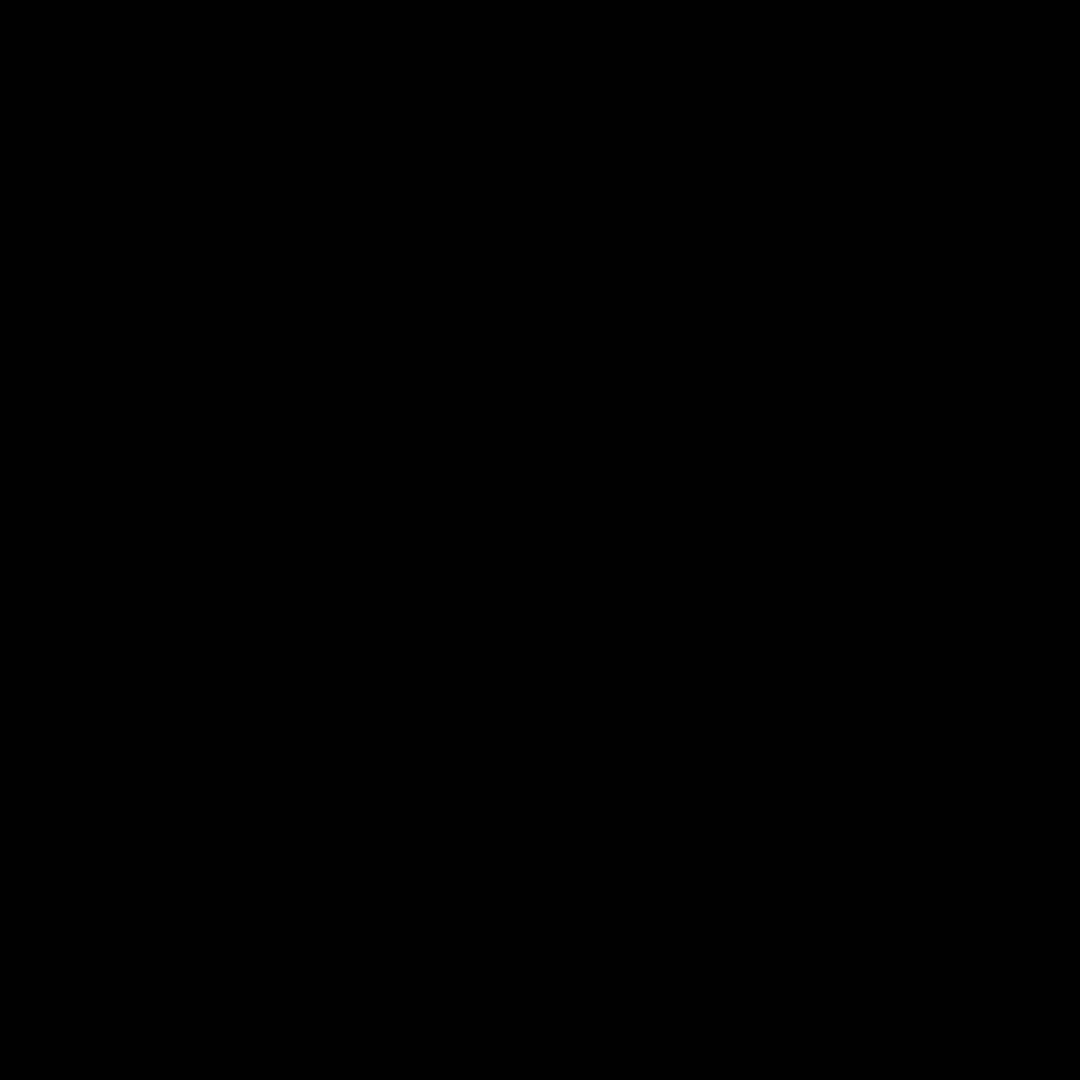

In [ ]:
Image.open(r"test/iron.jpg") 
convert_to_ela_image("test/iron.jpg",100) 

Size: (384, 256)


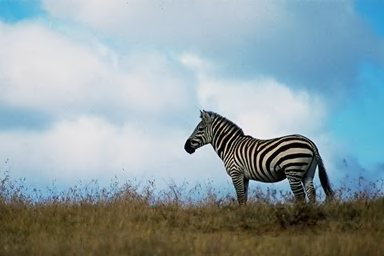

In [ ]:
def original():
  ori=Image.open(r"au/Au_ani_00001.jpg")
  print("Size:",ori.size)
  return ori
original()  


In [ ]:
def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'
    im = Image.open(filename).convert('RGB')
    
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)

    ela_im = ImageChops.difference(im, resaved_im)

#to get extreme points

    extrema = ela_im.getextrema()
    # print('extrema points:',extrema)

    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    # print("scale:",scale)
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    return ela_im


extrema points: ((0, 4), (0, 4), (0, 10))
scale: 25.5


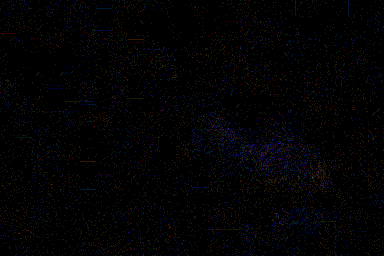

In [ ]:
#conversion of real into ela

Image.open(r"au/Au_ani_00001.jpg") 
convert_to_ela_image("au/Au_ani_00001.jpg",100) 

size: (384, 256)


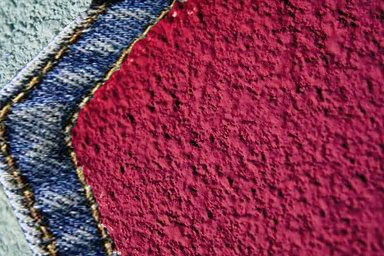

In [ ]:
#fake image
def tamp():
  tam = Image.open(r"Tp/Tp_D_CND_S_N_txt00028_txt00006_10848.jpg")
  print("size:",tam.size)
  return tam
tamp()  

extrema points: ((0, 18), (0, 10), (0, 13))
scale: 14.166666666666666


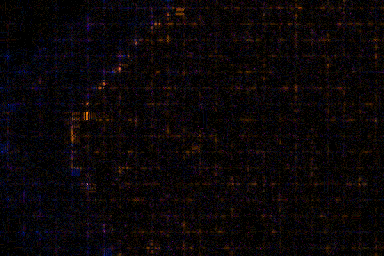

In [ ]:
#conversion of tampered into ela

Image.open(r"Tp/Tp_D_CND_S_N_txt00028_txt00006_10848.jpg") 
convert_to_ela_image("Tp/Tp_D_CND_S_N_txt00028_txt00006_10848.jpg",100) 


In [ ]:
#after resizeing the image:-reduce the resolution
image_size = (128, 128)
def prepare_image(image_path):
    return convert_to_ela_image(image_path, 90).resize(image_size)
X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

extrema points: ((0, 29), (0, 18), (0, 28))
scale: 8.793103448275861


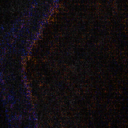

In [ ]:
#resized fake image
prepare_image("Tp/Tp_D_CND_S_N_txt00028_txt00006_10848.jpg")

extrema points: ((0, 14), (0, 14), (0, 16))
scale: 15.9375


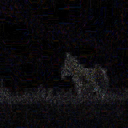

In [ ]:
#resized real image
prepare_image("au/Au_ani_00001.jpg")

In [ ]:
#convert the ela into numpy array 
image_size = (128, 128)
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size))
prepare_image("au/Au_ani_00001.jpg")    


extrema points: ((0, 14), (0, 14), (0, 16))
scale: 15.9375


array([[[13,  8, 13],
        [ 9,  7, 14],
        [ 9,  9,  8],
        ...,
        [ 1,  2,  2],
        [ 7,  2,  2],
        [ 1,  2,  0]],

       [[14,  6, 20],
        [ 7,  2, 16],
        [10,  9,  6],
        ...,
        [ 8,  2,  2],
        [ 6,  4,  2],
        [11,  7,  0]],

       [[16, 14,  9],
        [12,  5, 12],
        [11,  8, 21],
        ...,
        [ 4,  3, 12],
        [10,  5, 19],
        [15,  2, 16]],

       ...,

       [[ 8, 11, 18],
        [13, 16, 15],
        [10, 15, 18],
        ...,
        [13, 18, 14],
        [12,  6,  8],
        [19,  9,  8]],

       [[ 5,  5,  7],
        [ 3,  3,  4],
        [10, 11, 11],
        ...,
        [13, 10,  8],
        [11,  8, 10],
        [13,  9, 10]],

       [[ 8,  8,  8],
        [11, 11, 11],
        [ 9,  9,  9],
        ...,
        [24,  9, 25],
        [ 5,  3, 31],
        [10, 13, 30]]], dtype=uint8)

extrema points: ((0, 2), (0, 2), (0, 4))
scale: 63.75


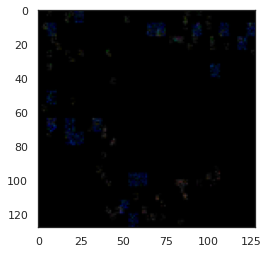

In [ ]:
#image plot using matplotlib

image_size = (128, 128)
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size))
plt.imshow(prepare_image("au/Au_ani_00003.jpg"))    

In [ ]:
#flattening
image_size = (128, 128)
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten()
prepare_image("au/Au_ani_00001.jpg")    

extrema points: ((0, 14), (0, 14), (0, 16))
scale: 15.9375


array([13,  8, 13, ..., 10, 13, 30], dtype=uint8)

In [ ]:
#normilisation for one image

image_size = (128, 128)
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten()/255.0
prepare_image("au/Au_ani_00001.jpg")
    

extrema points: ((0, 14), (0, 14), (0, 16))
scale: 15.9375


array([0.05098039, 0.03137255, 0.05098039, ..., 0.03921569, 0.05098039,
       0.11764706])

In [ ]:
#normilization for all elements in X

print(X)

[array([0.06666667, 0.01960784, 0.0745098 , ..., 0.01176471, 0.01176471,
       0.01176471]), array([0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
       0.00392157]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.00784314, 0.01176471, 0.01176471, ..., 0.04705882, 0.03921569,
       0.03529412]), array([0.0745098 , 0.02352941, 0.2       , ..., 0.12941176, 0.04313725,
       0.01568627]), array([0.10196078, 0.09019608, 0.10588235, ..., 0.04313725, 0.04705882,
       0.04705882]), array([0.        , 0.        , 0.        , ..., 0.13333333, 0.03921569,
       0.11372549]), array([0.16470588, 0.10980392, 0.14117647, ..., 0.01176471, 0.03137255,
       0.05098039]), array([0.        , 0.        , 0.        , ..., 0.00392157, 0.00784314,
       0.00784314]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.03529412, 0.03529412, 0.03529412, ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.0

extrema points: ((0, 14), (0, 14), (0, 16))
scale: 15.9375


TypeError: ignored

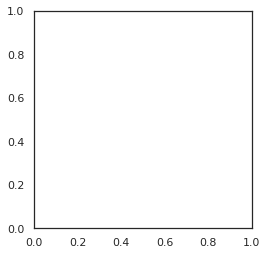

In [ ]:


image_size = (128, 128)
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten()/255.0
 

In [1]:
#Define two empty array

X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

In [ ]:
#process real image set

import random
path = 'au'

for dirname, _, filenames in os.walk(path):

    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')


Streaming output truncated to the last 5000 lines.
scale: 15.9375
extrema points: ((0, 4), (0, 4), (0, 6))
scale: 42.5
extrema points: ((0, 2), (0, 2), (0, 3))
scale: 85.0
extrema points: ((0, 14), (0, 16), (0, 21))
scale: 12.142857142857142
extrema points: ((0, 15), (0, 15), (0, 14))
scale: 17.0
extrema points: ((0, 13), (0, 13), (0, 13))
scale: 19.615384615384617
extrema points: ((0, 14), (0, 12), (0, 22))
scale: 11.590909090909092
extrema points: ((0, 3), (0, 3), (0, 7))
scale: 36.42857142857143
extrema points: ((0, 16), (0, 15), (0, 15))
scale: 15.9375
extrema points: ((0, 2), (0, 2), (0, 5))
scale: 51.0
extrema points: ((0, 4), (0, 4), (0, 5))
scale: 51.0
extrema points: ((0, 15), (0, 15), (0, 15))
scale: 17.0
extrema points: ((0, 6), (0, 5), (0, 5))
scale: 42.5
extrema points: ((0, 12), (0, 10), (0, 10))
scale: 21.25
extrema points: ((0, 8), (0, 4), (0, 8))
scale: 31.875
extrema points: ((0, 1), (0, 1), (0, 1))
scale: 255.0
extrema points: ((0, 12), (0, 14), (0, 13))
scale: 18.21

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


extrema points: ((0, 7), (0, 3), (0, 5))
scale: 36.42857142857143
extrema points: ((0, 11), (0, 13), (0, 14))
scale: 18.214285714285715
extrema points: ((0, 12), (0, 12), (0, 12))
scale: 21.25
extrema points: ((0, 16), (0, 15), (0, 20))
scale: 12.75
extrema points: ((0, 4), (0, 4), (0, 10))
scale: 25.5
extrema points: ((0, 6), (0, 6), (0, 8))
scale: 31.875
extrema points: ((0, 74), (0, 33), (0, 41))
scale: 3.445945945945946
extrema points: ((0, 2), (0, 2), (0, 2))
scale: 127.5
extrema points: ((0, 4), (0, 3), (0, 8))
scale: 31.875
extrema points: ((0, 4), (0, 3), (0, 8))
scale: 31.875
extrema points: ((0, 1), (0, 2), (0, 4))
scale: 63.75
extrema points: ((0, 2), (0, 2), (0, 7))
scale: 36.42857142857143
extrema points: ((0, 2), (0, 2), (0, 5))
scale: 51.0
extrema points: ((0, 40), (0, 24), (0, 52))
scale: 4.903846153846154
extrema points: ((0, 4), (0, 6), (0, 6))
scale: 42.5
extrema points: ((0, 13), (0, 13), (0, 13))
scale: 19.615384615384617
extrema points: ((0, 11), (0, 8), (0, 10))


In [ ]:
#values in y for real images
print(Y)
print(len(Y))


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
#shuffle and take  2100 images from au

random.shuffle(X)

X = X[:2100]
Y = Y[:2100]
print(len(X), len(Y))




2100 2100


In [ ]:
#process fake images

path = 'Tp'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')


Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images


In [ ]:
#after processing real and fake:total normalised images stored in x
print(X)

[array([0.25098039, 0.1254902 , 0.14117647, ..., 0.08235294, 0.08235294,
       0.08235294]), array([0.00784314, 0.02352941, 0.04313725, ..., 0.        , 0.        ,
       0.        ]), array([0.16862745, 0.21176471, 0.15686275, ..., 0.12156863, 0.09411765,
       0.14117647]), array([0.        , 0.        , 0.        , ..., 0.01960784, 0.01568627,
       0.01568627]), array([0.05098039, 0.05098039, 0.12156863, ..., 0.0745098 , 0.08235294,
       0.16470588]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.12941176, 0.08627451, 0.10980392, ..., 0.12156863, 0.07058824,
       0.05490196]), array([0.13333333, 0.12941176, 0.23529412, ..., 0.05098039, 0.05098039,
       0.05098039]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.00784314, 0.01176471, ..., 0.02352941, 0.02352941,
       0.03529412]), array([0.11372549, 0.11372549, 0.16470588, ..., 0.15294118, 0.15294118,
       0.14509804]), array([0.04705882, 0.04313725, 0.05098039, ..., 

In [ ]:
#after processing 

print(Y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
print("length of X:",len(X))
print("length of Y:",len(Y))

length of X: 4175
length of Y: 4175


In [ ]:
X = np.array(X)
Y = to_categorical(Y, 2)

In [ ]:
print("X:",X)

X: [[0.25098039 0.1254902  0.14117647 ... 0.08235294 0.08235294 0.08235294]
 [0.00784314 0.02352941 0.04313725 ... 0.         0.         0.        ]
 [0.16862745 0.21176471 0.15686275 ... 0.12156863 0.09411765 0.14117647]
 ...
 [0.04705882 0.04705882 0.04313725 ... 0.09411765 0.04705882 0.09803922]
 [0.01176471 0.01960784 0.04705882 ... 0.03529412 0.0627451  0.01960784]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
print(Y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
X = X.reshape(-1, 128, 128, 3)

In [ ]:
print(X)

[[[[0.25098039 0.1254902  0.14117647]
   [0.19215686 0.16470588 0.16470588]
   [0.12156863 0.08627451 0.16078431]
   ...
   [0.06666667 0.05490196 0.15686275]
   [0.09411765 0.07058824 0.10980392]
   [0.09411765 0.09411765 0.10588235]]

  [[0.16470588 0.1254902  0.10980392]
   [0.1254902  0.10196078 0.1254902 ]
   [0.11764706 0.11372549 0.12156863]
   ...
   [0.04313725 0.03137255 0.11764706]
   [0.03921569 0.04313725 0.07843137]
   [0.1372549  0.11372549 0.14117647]]

  [[0.10588235 0.1254902  0.12941176]
   [0.10588235 0.08627451 0.13333333]
   [0.13333333 0.14117647 0.1372549 ]
   ...
   [0.09019608 0.09803922 0.0745098 ]
   [0.10196078 0.08627451 0.08235294]
   [0.2        0.18431373 0.17647059]]

  ...

  [[0.         0.         0.        ]
   [0.05490196 0.03137255 0.00392157]
   [0.05098039 0.03529412 0.01960784]
   ...
   [0.10588235 0.1254902  0.1372549 ]
   [0.10196078 0.1254902  0.10588235]
   [0.15294118 0.14117647 0.12941176]]

  [[0.02352941 0.00392157 0.00392157]
   [0.0

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)
X = X.reshape(-1,1,1,1)


In [ ]:
print("X:",X)

X: [[[[0.25098039]]]


 [[[0.1254902 ]]]


 [[[0.14117647]]]


 ...


 [[[0.        ]]]


 [[[0.        ]]]


 [[[0.        ]]]]


In [ ]:
print("Y:",Y)

Y: [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
print('Training:',len(X_train), len(Y_train))
print('Testing:',len(X_val), len(Y_val))


Training: 3340 3340
Testing: 835 835


### MODEL CREATION

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def build_model():
    model = tensorflow .keras.Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = 'softmax'))
    return model

In [ ]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dense (Dense)               (None, 256)               29491456  
                                                        

In [ ]:
epochs = 30
batch_size = 32
init_lr = 1e-4
optimizer = Adam(learning_rate = init_lr, decay = init_lr/epochs)


In [ ]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [ ]:
hist = model.fit(X_train,Y_train,batch_size = batch_size,epochs = epochs,validation_data = (X_val, Y_val))
model.save('model_casia_run1.h5')


Epoch 1/25
105/105 [==============================] - 17s 48ms/step - loss: 0.4759 - accuracy: 0.7820 - val_loss: 0.3266 - val_accuracy: 0.8707
Epoch 2/25
105/105 [==============================] - 4s 41ms/step - loss: 0.3140 - accuracy: 0.8916 - val_loss: 0.2599 - val_accuracy: 0.9150
Epoch 3/25
105/105 [==============================] - 4s 41ms/step - loss: 0.2629 - accuracy: 0.9051 - val_loss: 0.1964 - val_accuracy: 0.9329
Epoch 4/25
105/105 [==============================] - 4s 41ms/step - loss: 0.2157 - accuracy: 0.9225 - val_loss: 0.1729 - val_accuracy: 0.9437
Epoch 5/25
105/105 [==============================] - 4s 41ms/step - loss: 0.1858 - accuracy: 0.9257 - val_loss: 0.1512 - val_accuracy: 0.9473
Epoch 6/25
105/105 [==============================] - 5s 44ms/step - loss: 0.1491 - accuracy: 0.9431 - val_loss: 0.1698 - val_accuracy: 0.9305
Epoch 7/25
105/105 [==============================] - 4s 41ms/step - loss: 0.1309 - accuracy: 0.9497 - val_loss: 0.1361 - val_accuracy: 0.946

In [ ]:
hist = model.fit(X_train,Y_train,batch_size = batch_size,epochs = epochs,validation_data = (X_val, Y_val) ,callbacks = [early_stopping])
model.save('model_casia_run1.h5')

Epoch 1/30
105/105 [==============================] - 5s 44ms/step - loss: 0.0128 - accuracy: 0.9964 - val_loss: 0.1839 - val_accuracy: 0.9413
Epoch 2/30
105/105 [==============================] - 4s 42ms/step - loss: 0.0117 - accuracy: 0.9967 - val_loss: 0.1821 - val_accuracy: 0.9437
Epoch 3/30
105/105 [==============================] - 5s 44ms/step - loss: 0.0138 - accuracy: 0.9970 - val_loss: 0.1958 - val_accuracy: 0.9449
Epoch 4/30
105/105 [==============================] - 4s 41ms/step - loss: 0.0089 - accuracy: 0.9982 - val_loss: 0.2012 - val_accuracy: 0.9425


In [ ]:
epochs = 25
batch_size = 32
init_lr = 1e-4
optimizer = Adam(learning_rate = init_lr, decay = init_lr/epochs)

In [ ]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
hist = model.fit(X_train,Y_train,batch_size = batch_size,epochs = epochs,validation_data = (X_val, Y_val))
model.save('model_casia_run1.h5')

Epoch 1/10
105/105 [==============================] - 6s 48ms/step - loss: 0.0145 - accuracy: 0.9946 - val_loss: 0.1913 - val_accuracy: 0.9365
Epoch 2/10
105/105 [==============================] - 4s 41ms/step - loss: 0.0118 - accuracy: 0.9952 - val_loss: 0.2270 - val_accuracy: 0.9341
Epoch 3/10
105/105 [==============================] - 4s 41ms/step - loss: 0.0177 - accuracy: 0.9946 - val_loss: 0.2007 - val_accuracy: 0.9425
Epoch 4/10
105/105 [==============================] - 4s 41ms/step - loss: 0.0101 - accuracy: 0.9976 - val_loss: 0.2172 - val_accuracy: 0.9425
Epoch 5/10
105/105 [==============================] - 4s 41ms/step - loss: 0.0117 - accuracy: 0.9955 - val_loss: 0.1927 - val_accuracy: 0.9401
Epoch 6/10
105/105 [==============================] - 5s 44ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.2343 - val_accuracy: 0.9413
Epoch 7/10
105/105 [==============================] - 4s 41ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.2212 - val_accuracy: 0.9449

In [ ]:
hist = model.fit(X_train,Y_train,batch_size = batch_size,epochs = epochs,validation_data = (X_val, Y_val))
model.save('model_casia_run1.h5')

Epoch 1/30
105/105 [==============================] - 5s 46ms/step - loss: 0.0167 - accuracy: 0.9937 - val_loss: 0.2091 - val_accuracy: 0.9389
Epoch 2/30
105/105 [==============================] - 4s 41ms/step - loss: 0.0093 - accuracy: 0.9979 - val_loss: 0.2187 - val_accuracy: 0.9317
Epoch 3/30
105/105 [==============================] - 4s 41ms/step - loss: 0.0085 - accuracy: 0.9982 - val_loss: 0.2441 - val_accuracy: 0.9461
Epoch 4/30
105/105 [==============================] - 5s 43ms/step - loss: 0.0077 - accuracy: 0.9973 - val_loss: 0.2287 - val_accuracy: 0.9437
Epoch 5/30
105/105 [==============================] - 4s 41ms/step - loss: 0.0086 - accuracy: 0.9967 - val_loss: 0.2054 - val_accuracy: 0.9449
Epoch 6/30
105/105 [==============================] - 4s 41ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.2412 - val_accuracy: 0.9425
Epoch 7/30
105/105 [==============================] - 4s 41ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.2366 - val_accuracy: 0.9401

In [ ]:
hist = model.fit(X_train,Y_train,batch_size = batch_size,epochs = epochs,validation_data = (X_val, Y_val))
model.save('model_casia_run1.h5')

Epoch 1/25
105/105 [==============================] - 5s 45ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3098 - val_accuracy: 0.9437
Epoch 2/25
105/105 [==============================] - 4s 41ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.2864 - val_accuracy: 0.9353
Epoch 3/25
105/105 [==============================] - 4s 41ms/step - loss: 0.0071 - accuracy: 0.9967 - val_loss: 0.2496 - val_accuracy: 0.9413
Epoch 4/25
105/105 [==============================] - 4s 41ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.2573 - val_accuracy: 0.9401
Epoch 5/25
105/105 [==============================] - 4s 41ms/step - loss: 0.0045 - accuracy: 0.9979 - val_loss: 0.3279 - val_accuracy: 0.9425
Epoch 6/25
105/105 [==============================] - 4s 41ms/step - loss: 0.0089 - accuracy: 0.9961 - val_loss: 0.2603 - val_accuracy: 0.9473
Epoch 7/25
105/105 [==============================] - 4s 41ms/step - loss: 0.0026 - accuracy: 0.9988 - val_loss: 0.3013 - val_accuracy: 0.9437

### PREDICT

In [1]:
class_names = ['fake', 'real']

In [ ]:
real_image_path = '/kaggle/input/casia-dataset/casia/CASIA2/Au/Au_ani_00001.jpg'#DRIVE REAL IMG LOC
Image.open(real_image_path)
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

In [ ]:
fake_image_path = '/kaggle/input/casia-dataset/casia/CASIA2/Tp/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg'#DRIVE FAKE IMG LOC
Image.open(fake_image_path)
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/MyDrive/project/fakeimage new/fakeimage new

/content/drive/MyDrive/project/fakeimage new/fakeimage new


In [ ]:
!python predict.py

2022-07-21 13:40:57.017141: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Class: real Confidence: 100.00


In [ ]:
!python predict.py

2022-07-21 13:46:00.197182: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Class: fake Confidence: 72.44
